In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('big_merge.csv')
data[['retail_price','bl_sold_avgprice_new']].corr() #correlation matrix

C:\Users\A\AppData\Local\Temp\ipykernel_19672\1192468429.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('big_merge.csv')


,retail_price,bl_sold_avgprice_new
retail_price,1.000000,0.410455
bl_sold_avgprice_new,0.410455,1.000000


<Axes: xlabel='retail_price', ylabel='bl_sold_avgprice_new'>

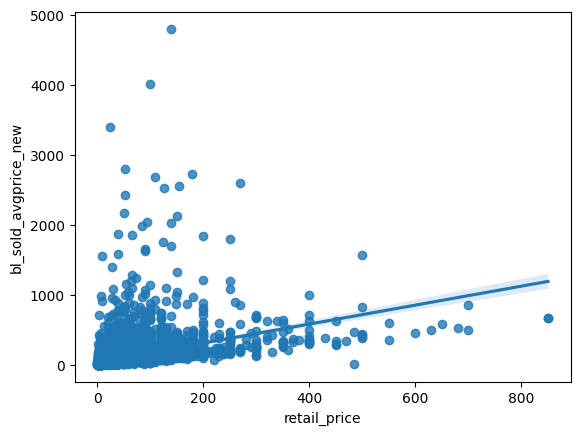

In [3]:
sns.regplot(data, x = 'retail_price', y = 'bl_sold_avgprice_new')

<Axes: xlabel='retail_price', ylabel='bl_sold_avgprice_new'>

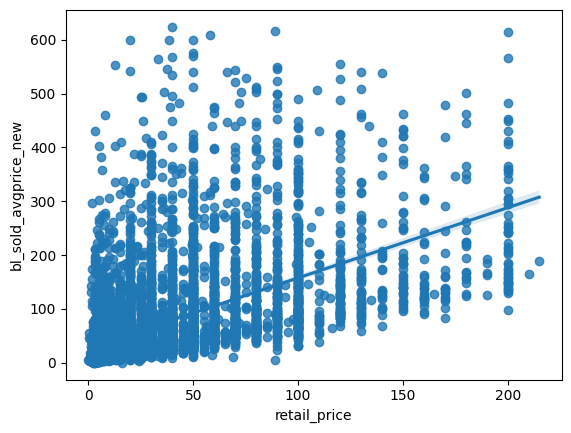

In [4]:
# identify outliers with a z-score greater than 3
threshold = 3
data_wo_outliers = data[data['retail_price'].notnull() & data['bl_sold_avgprice_new'].notnull()]
data_wo_outliers = data_wo_outliers[np.abs(stats.zscore(data_wo_outliers['retail_price'])) < threshold]
data_wo_outliers = data_wo_outliers[np.abs(stats.zscore(data_wo_outliers['bl_sold_avgprice_new'])) < threshold]
sns.regplot(data_wo_outliers, x = 'retail_price', y = 'bl_sold_avgprice_new')

In [5]:
data_wo_outliers[['retail_price','bl_sold_avgprice_new']].corr() #correlation matrix

,retail_price,bl_sold_avgprice_new
retail_price,1.000000,0.537626
bl_sold_avgprice_new,0.537626,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Packaging                       14936 non-null  object 
 1   Num_Instructions                14936 non-null  float64
 2   Availability                    14936 non-null  object 
 3   Owned                           14771 non-null  float64
 4   Rating                          7038 non-null   float64
 5   set_id                          25201 non-null  object 
 6   name                            25201 non-null  object 
 7   year                            25201 non-null  float64
 8   agerange_min                    6787 non-null   float64
 9   bricksetURL                     18457 non-null  object 
 10  thumbnailURL                    17451 non-null  object 
 11  num_pieces                      23408 non-null  float64
 12  set_theme                       

In [7]:
# trying to find the most significant factors influencing the sales price of new (unopened) sets on Bricklink
formula = 'bl_sold_avgprice_new ~ Num_Instructions + Owned + Rating + year + agerange_min + num_pieces + minifigures + retail_price + bs_wanted + bl_sold_qty_new + bl_sold_qty_used + bl_offer_qty_new + bl_offer_qty_used'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary() # R-squared is fairly low and the data are not normally distributed which I know from the Omnibus and Jarque-Bera (JB) values - I cannot use the coefficient p-values to evaluate their statistical significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     bl_sold_avgprice_new   R-squared:                       0.587
Model:                              OLS   Adj. R-squared:                  0.584
Method:                   Least Squares   F-statistic:                     263.0
Date:                  Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                          22:09:16   Log-Likelihood:                -13153.
No. Observations:                  2237   AIC:                         2.633e+04
Df Residuals:                      2224   BIC:                         2.641e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.874e+04    970.847     19.300      0.000    1.68e+04    2.06e+04
Num_Instructions     -5.9489      0.889     -6.691      0.000      -7.692      -4.205
Owned                -0.0039      0.001     -5.133      0.000      -0.005      -0.002
Rating               69.6560      7.290      9.555      0.000      55.360      83.951
year                 -9.4217      0.481    -19.572      0.000     -10.366      -8.478
agerange_min          4.5958      1.228      3.741      0.000       2.187       7.005
num_pieces            0.0312      0.011      2.753      0.006       0.009       0.053
minifigures           0.7608      0.842      0.904      0.366      -0.890       2.411
retail_price          1.0093      0.109      9.287      0.000       0.796       1.222
bs_wanted         -6.867e-10   3.56e-11    -19.299      0.000   -7.56e-10   -6.17e-10
bl_sold_qty_new       0.0101      0.040      0.251      0.802      -0.069       0.089
bl_sold_qty_used      1.5642      0.245      6.382      0.000       1.084       2.045
bl_offer_qty_new     -0.0160      0.008     -2.023      0.043      -0.031      -0.000
bl_offer_qty_used    -0.2137      0.093     -2.301      0.021      -0.396      -0.032
==============================================================================
Omnibus:                     2755.740   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           629474.270
Skew:                           6.313   Prob(JB):                         0.00
Kurtosis:                      84.203   Cond. No.                     4.63e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
#getting rid of variables with low impact on R-squared
formula = 'bl_sold_avgprice_new ~ Num_Instructions + Owned + Rating + year + agerange_min + minifigures + retail_price + bl_sold_qty_used'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     bl_sold_avgprice_new   R-squared:                       0.583
Model:                              OLS   Adj. R-squared:                  0.582
Method:                   Least Squares   F-statistic:                     393.6
Date:                  Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                          22:09:17   Log-Likelihood:                -13296.
No. Observations:                  2261   AIC:                         2.661e+04
Df Residuals:                      2252   BIC:                         2.666e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.885e+04    899.913     20.946      0.000    1.71e+04    2.06e+04
Num_Instructions    -6.1637      0.879     -7.013      0.000      -7.887      -4.440
Owned               -0.0046      0.001     -6.983      0.000      -0.006      -0.003
Rating              72.4990      7.179     10.098      0.000      58.420      86.578
year                -9.4898      0.447    -21.245      0.000     -10.366      -8.614
agerange_min         6.1554      1.079      5.704      0.000       4.039       8.272
minifigures          1.2314      0.825      1.492      0.136      -0.387       2.850
retail_price         1.2650      0.052     24.172      0.000       1.162       1.368
bl_sold_qty_used     1.4813      0.238      6.217      0.000       1.014       1.949
==============================================================================
Omnibus:                     2783.374   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           629921.066
Skew:                           6.312   Prob(JB):                         0.00
Kurtosis:                      83.791   Cond. No.                     3.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Packaging                       14936 non-null  object 
 1   Num_Instructions                14936 non-null  float64
 2   Availability                    14936 non-null  object 
 3   Owned                           14771 non-null  float64
 4   Rating                          7038 non-null   float64
 5   set_id                          25201 non-null  object 
 6   name                            25201 non-null  object 
 7   year                            25201 non-null  float64
 8   agerange_min                    6787 non-null   float64
 9   bricksetURL                     18457 non-null  object 
 10  thumbnailURL                    17451 non-null  object 
 11  num_pieces                      23408 non-null  float64
 12  set_theme                       

In [10]:
#adding category variables for further analysis
formula = 'bl_sold_avgprice_new ~ Num_Instructions + Owned + Rating + year + agerange_min + minifigures + retail_price + bl_sold_qty_used + C(Packaging) + C(Availability) + C(set_theme) + C(set_theme_group) + C(set_subtheme) + C(set_category) + C(r_main_theme)'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     bl_sold_avgprice_new   R-squared:                       0.760
Model:                              OLS   Adj. R-squared:                  0.703
Method:                   Least Squares   F-statistic:                     13.25
Date:                  Sat, 01 Jun 2024   Prob (F-statistic):          4.40e-304
Time:                          22:09:26   Log-Likelihood:                -10924.
No. Observations:                  1942   AIC:                         2.260e+04
Df Residuals:                      1566   BIC:                         2.470e+04
Df Model:                           375                                         
Covariance Type:              nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       1.508e+04    849.529     17.755      0.000    1.34e+04    1.68e+04
C(Packaging)[T.Box]                                               47.6538     24.708      1.929      0.054      -0.810      96.117
C(Packaging)[T.Box with backing card]                             11.7976     56.931      0.207      0.836     -99.871     123.467
C(Packaging)[T.Box with handle]                                   80.6760     35.436      2.277      0.023      11.169     150.183
C(Packaging)[T.Bucket]                                            25.7918     88.849      0.290      0.772    -148.484     200.068
C(Packaging)[T.Canister]                                        1.918e-07   1.08e-08     17.745      0.000    1.71e-07    2.13e-07
C(Packaging)[T.Foil pack]                                         18.3250     53.896      0.340      0.734     -87.391     124.041
C(Packaging)[T.None (loose parts)]                              9.795e-08   5.54e-09     17.679      0.000    8.71e-08    1.09e-07
C(Packaging)[T.Other]                                             71.2018     54.105      1.316      0.188     -34.923     177.327
C(Packaging)[T.Paper bag]                                      -4.877e-08   3.16e-09    -15.435      0.000    -5.5e-08   -4.26e-08
C(Packaging)[T.Plastic box]                                     1.526e-07   8.89e-09     17.155      0.000    1.35e-07     1.7e-07
C(Packaging)[T.Plastic canister]                                3.936e-07   2.23e-08     17.616      0.000     3.5e-07    4.37e-07
C(Packaging)[T.Polybag]                                           37.4121     27.819      1.345      0.179     -17.153      91.978
C(Packaging)[T.Shrink-wrapped]                                 -4.604e-07   2.58e-08    -17.831      0.000   -5.11e-07    -4.1e-07
C(Packaging)[T.Tag]                                            -8.285e-08   4.67e-09    -17.742      0.000    -9.2e-08   -7.37e-08
C(Packaging)[T.Tub]                                              -22.2048     63.240     -0.351      0.726    -146.249     101.840
C(Packaging)[T.{Not specified}]                                   13.3426     26.523      0.503      0.615     -38.682      65.367
C(Availability)[T.LEGO exclusive]                               2488.2721    136.077     18.286      0.000    2221.361    2755.184
C(Availability)[T.LEGOLAND exclusive]                            709.4863     42.622     16.646      0.000     625.884     793.088
C(Availability)[T.Not sold]                                     2466.2558    162.359     15.190      0.000    2147.792    2784.719
C(Availability)[T.Promotional]                  

In [11]:
#getting rid of variables with low impact on R-squared
formula = 'bl_sold_avgprice_new ~ Num_Instructions + Owned + Rating + year + agerange_min + minifigures + retail_price + bl_sold_qty_used + C(Packaging) + C(Availability) + C(set_theme) + C(set_subtheme) + C(r_main_theme)'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     bl_sold_avgprice_new   R-squared:                       0.760
Model:                              OLS   Adj. R-squared:                  0.702
Method:                   Least Squares   F-statistic:                     13.24
Date:                  Sat, 01 Jun 2024   Prob (F-statistic):          1.39e-303
Time:                          22:09:39   Log-Likelihood:                -10927.
No. Observations:                  1942   AIC:                         2.260e+04
Df Residuals:                      1567   BIC:                         2.469e+04
Df Model:                           374                                         
Covariance Type:              nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       2.126e+04   1205.313     17.638      0.000    1.89e+04    2.36e+04
C(Packaging)[T.Box]                                               65.2534     23.525      2.774      0.006      19.110     111.397
C(Packaging)[T.Box with backing card]                             14.6502     56.995      0.257      0.797     -97.145     126.445
C(Packaging)[T.Box with handle]                                  138.6780     35.517      3.905      0.000      69.012     208.344
C(Packaging)[T.Bucket]                                            43.5878     88.633      0.492      0.623    -130.263     217.439
C(Packaging)[T.Canister]                                        2.642e-07   1.51e-08     17.521      0.000    2.35e-07    2.94e-07
C(Packaging)[T.Foil pack]                                         23.5676     53.922      0.437      0.662     -82.198     129.334
C(Packaging)[T.None (loose parts)]                              2.786e-08   1.57e-09     17.723      0.000    2.48e-08    3.09e-08
C(Packaging)[T.Other]                                             74.4741     54.160      1.375      0.169     -31.759     180.708
C(Packaging)[T.Paper bag]                                      -4.454e-07   2.53e-08    -17.577      0.000   -4.95e-07   -3.96e-07
C(Packaging)[T.Plastic box]                                    -1.325e-07   7.58e-09    -17.480      0.000   -1.47e-07   -1.18e-07
C(Packaging)[T.Plastic canister]                                -1.71e-07   1.08e-08    -15.877      0.000   -1.92e-07    -1.5e-07
C(Packaging)[T.Polybag]                                           54.9288     26.792      2.050      0.041       2.377     107.481
C(Packaging)[T.Shrink-wrapped]                                  8.497e-08   5.43e-09     15.655      0.000    7.43e-08    9.56e-08
C(Packaging)[T.Tag]                                            -4.688e-07   2.65e-08    -17.703      0.000   -5.21e-07   -4.17e-07
C(Packaging)[T.Tub]                                               93.8659     64.007      1.466      0.143     -31.683     219.415
C(Packaging)[T.{Not specified}]                                    3.8359     26.235      0.146      0.884     -47.623      55.295
C(Availability)[T.LEGO exclusive]                               3449.4259    190.960     18.064      0.000    3074.861    3823.991
C(Availability)[T.LEGOLAND exclusive]                           1117.6631     65.467     17.072      0.000     989.251    1246.075
C(Availability)[T.Not sold]                                     3427.4970    210.833     16.257      0.000    3013.952    3841.041
C(Availability)[T.Promotional]                  

In [12]:
# Identify outliers with a z-score greater than 3 - I want to mark positive outliers with +1 and negative outliers with -1 for further analyses and visualizations
threshold = 3
data_current_price = data[data['bl_sold_avgprice_new'].notnull()]
data_current_price = data_current_price[['set_id','bl_sold_avgprice_new']]
outliers_1 = data_current_price[stats.zscore(data_current_price['bl_sold_avgprice_new']) > threshold]
outliers_1['outlier_bl_sold_avgprice_new'] = 1
outliers_n1 = data_current_price[stats.zscore(data_current_price['bl_sold_avgprice_new']) < -threshold]
outliers_n1['outlier_bl_sold_avgprice_new'] = -1
outliers_n1.info() # no negative outliers found

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   set_id                        0 non-null      object 
 1   bl_sold_avgprice_new          0 non-null      float64
 2   outlier_bl_sold_avgprice_new  0 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 0.0+ bytes


C:\Users\A\AppData\Local\Temp\ipykernel_19672\992775867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_1['outlier_bl_sold_avgprice_new'] = 1


In [13]:
data = pd.merge(data,outliers_1[['set_id','outlier_bl_sold_avgprice_new']],how='left',on='set_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Packaging                       14936 non-null  object 
 1   Num_Instructions                14936 non-null  float64
 2   Availability                    14936 non-null  object 
 3   Owned                           14771 non-null  float64
 4   Rating                          7038 non-null   float64
 5   set_id                          25201 non-null  object 
 6   name                            25201 non-null  object 
 7   year                            25201 non-null  float64
 8   agerange_min                    6787 non-null   float64
 9   bricksetURL                     18457 non-null  object 
 10  thumbnailURL                    17451 non-null  object 
 11  num_pieces                      23408 non-null  float64
 12  set_theme                       

In [14]:
# Identify outliers with a z-score greater than 3 in percent price increases
threshold = 3
data_current_price = data[data['bl_percent_price_increase_new'].notnull()]
data_current_price = data_current_price[['set_id','bl_percent_price_increase_new']]
outliers_1 = data_current_price[stats.zscore(data_current_price['bl_percent_price_increase_new']) > threshold]
outliers_n1 = data_current_price[stats.zscore(data_current_price['bl_percent_price_increase_new']) < -threshold]
outliers_n1.info() # no negative outliers found

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   set_id                         0 non-null      object 
 1   bl_percent_price_increase_new  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 0.0+ bytes


In [15]:
outliers_1['outlier_bl_percent_price_increase_new'] = 1
data = pd.merge(data,outliers_1[['set_id','outlier_bl_percent_price_increase_new']],how='left',on='set_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Packaging                              14936 non-null  object 
 1   Num_Instructions                       14936 non-null  float64
 2   Availability                           14936 non-null  object 
 3   Owned                                  14771 non-null  float64
 4   Rating                                 7038 non-null   float64
 5   set_id                                 25201 non-null  object 
 6   name                                   25201 non-null  object 
 7   year                                   25201 non-null  float64
 8   agerange_min                           6787 non-null   float64
 9   bricksetURL                            18457 non-null  object 
 10  thumbnailURL                           17451 non-null  object 
 11  nu

C:\Users\A\AppData\Local\Temp\ipykernel_19672\1837602864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_1['outlier_bl_percent_price_increase_new'] = 1


In [16]:
# Identify outliers with a z-score greater than 3 in absolute price increases
threshold = 3
data_current_price = data[data['bl_price_increase_new'].notnull()]
data_current_price = data_current_price[['set_id','bl_price_increase_new']]
outliers_1 = data_current_price[stats.zscore(data_current_price['bl_price_increase_new']) > threshold]
outliers_n1 = data_current_price[stats.zscore(data_current_price['bl_price_increase_new']) < -threshold]
outliers_n1.info() # 1 negative outlier found

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 25014 to 25014
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   set_id                 1 non-null      object 
 1   bl_price_increase_new  1 non-null      float64
dtypes: float64(1), object(1)
memory usage: 24.0+ bytes


In [17]:
outliers_1['outlier_bl_price_increase_new'] = 1
outliers_n1['outlier_bl_price_increase_new'] = -1
outliers = pd.merge(outliers_1[['set_id','outlier_bl_price_increase_new']],outliers_n1[['set_id','outlier_bl_price_increase_new']],how='outer',on='set_id')
outliers['outlier_bl_price_increase_new']=outliers[['outlier_bl_price_increase_new_x','outlier_bl_price_increase_new_y']].bfill(axis=1).iloc[:, 0]
outliers.drop(columns = ['outlier_bl_price_increase_new_x','outlier_bl_price_increase_new_y'],inplace = True)
data = pd.merge(data,outliers[['set_id','outlier_bl_price_increase_new']],how='left',on='set_id')
data.info()

C:\Users\A\AppData\Local\Temp\ipykernel_19672\1474148065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_1['outlier_bl_price_increase_new'] = 1
C:\Users\A\AppData\Local\Temp\ipykernel_19672\1474148065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_n1['outlier_bl_price_increase_new'] = -1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Packaging                              14936 non-null  object 
 1   Num_Instructions                       14936 non-null  float64
 2   Availability                           14936 non-null  object 
 3   Owned                                  14771 non-null  float64
 4   Rating                                 7038 non-null   float64
 5   set_id                                 25201 non-null  object 
 6   name                                   25201 non-null  object 
 7   year                                   25201 non-null  float64
 8   agerange_min                           6787 non-null   float64
 9   bricksetURL                            18457 non-null  object 
 10  thumbnailURL                           17451 non-null  object 
 11  nu

In [18]:
data.to_csv('big_merge_s1.csv',index = False)